# Avaliação da Qualidade do Ar Urbano
Condiserando as diferentes características climáticas, elabore um modelo de Machine Learning capaz de prever o Score de Risco a Saúde

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv(r'C:\Users\Lucas\OneDrive\ESTUDOS\Kaggle\2024\Urban Air Quality and Health Impact Dataset.csv', sep=',')
dataset.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [3]:
# dicionário de colunas
dicionario_colunas = dict(
                            DateTime='Data_hora',
                            City='Cidade',
                            Temp_Max='Temperatura máxima',
                            Temp_Min='Temperatura mínima',
                            Temp_Avg='Temperatura média',
                            Feels_Like_Max='Sensação térmica máxima',
                            Feels_Like_Min='Sensação térmica mínima',
                            Feels_Like_Avg='Sensação térmica média',
                            Dew_Point='Temperatura do ponto de orvalho',
                            Humidity='Umidade relativa',
                            Precipitation='Precipitação total',
                            Precip_Prob='Probabilidade de precipitação',
                            Precip_Cover='Cobertura de precipitação',
                            Precip_Type='Tipo de precipitação',
                            Snow='Quantidade de neve',
                            Snow_Depth='Profundidade da neve',
                            Wind_Gust='Velocidade máxima das rajadas de vento',
                            Wind_Speed='Velocidade média do vento',
                            Wind_Direction='Direção do vento',
                            Pressure='Pressão atmosférica',
                            Cloud_Cover='Cobertura de nuvens',
                            Visibility='Distância de visibilidade',
                            Solar_Radiation='Radiação solar',
                            Solar_Energy='Energia solar recebida',
                            UV_Index='Índice UV',
                            Severe_Risk='Risco de clima severo',
                            Sunrise='Hora do nascer do sol',
                            Sunset='Hora do pôr do sol',
                            Moon_Phase='Fase da lua',
                            Conditions='Condições climáticas gerais',
                            Description='Descrição detalhada das condições climáticas',
                            Icon='Ícone de condições climáticas',
                            Stations='Estações meteorológicas',
                            Source='Fonte dos dados',
                            Temp_Range='Variação de temperatura',
                            Heat_Index='Índice de calor',
                            Severity_Score='Pontuação de severidade das condições climáticas',
                            Condition_Code='Código das condições climáticas',
                            Month='Mês',
                            Season='Estação do ano',
                            Day_of_Week='Dia da semana',
                            Is_Weekend='Indicador de fim de semana',
                            Health_Risk_Score='Pontuação de risco à saúde'
)


In [4]:
#!pip install missingno

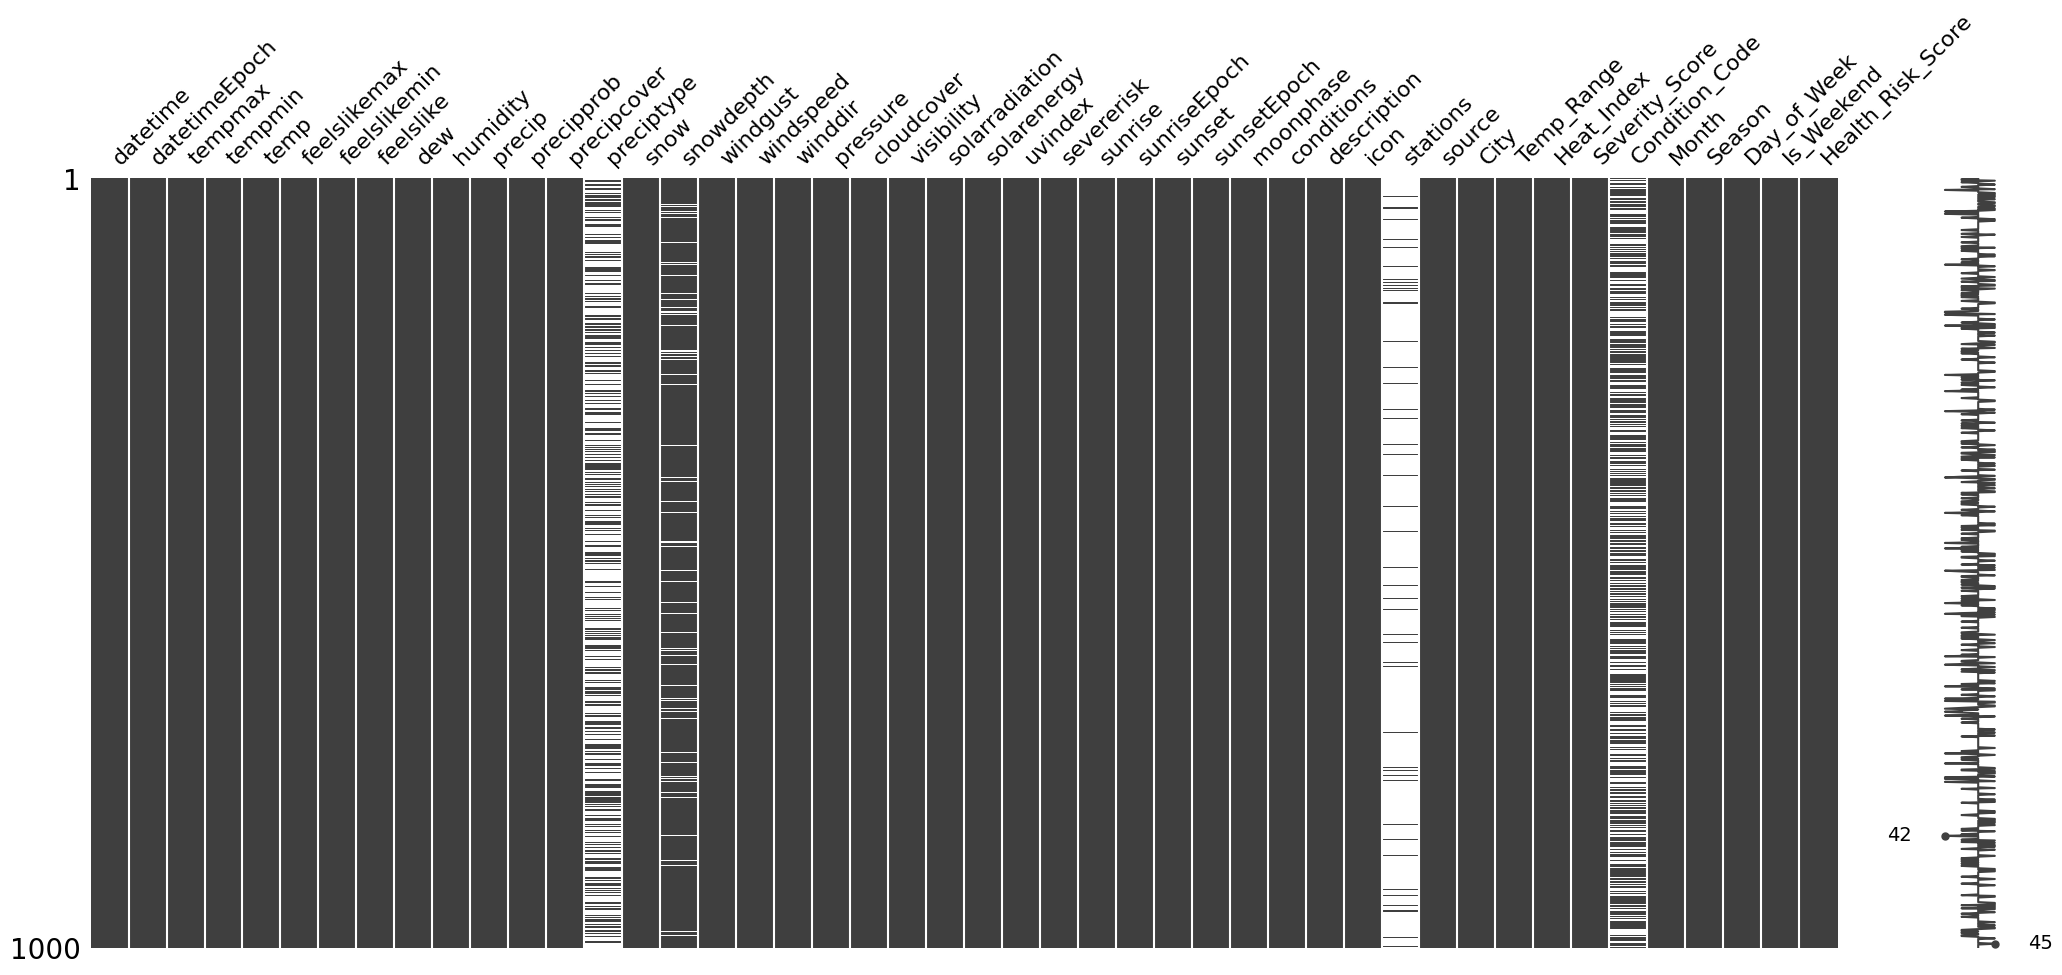

In [5]:
# visualização de dados nulos

import missingno as msno
ax = msno.matrix(dataset.sample(1000))

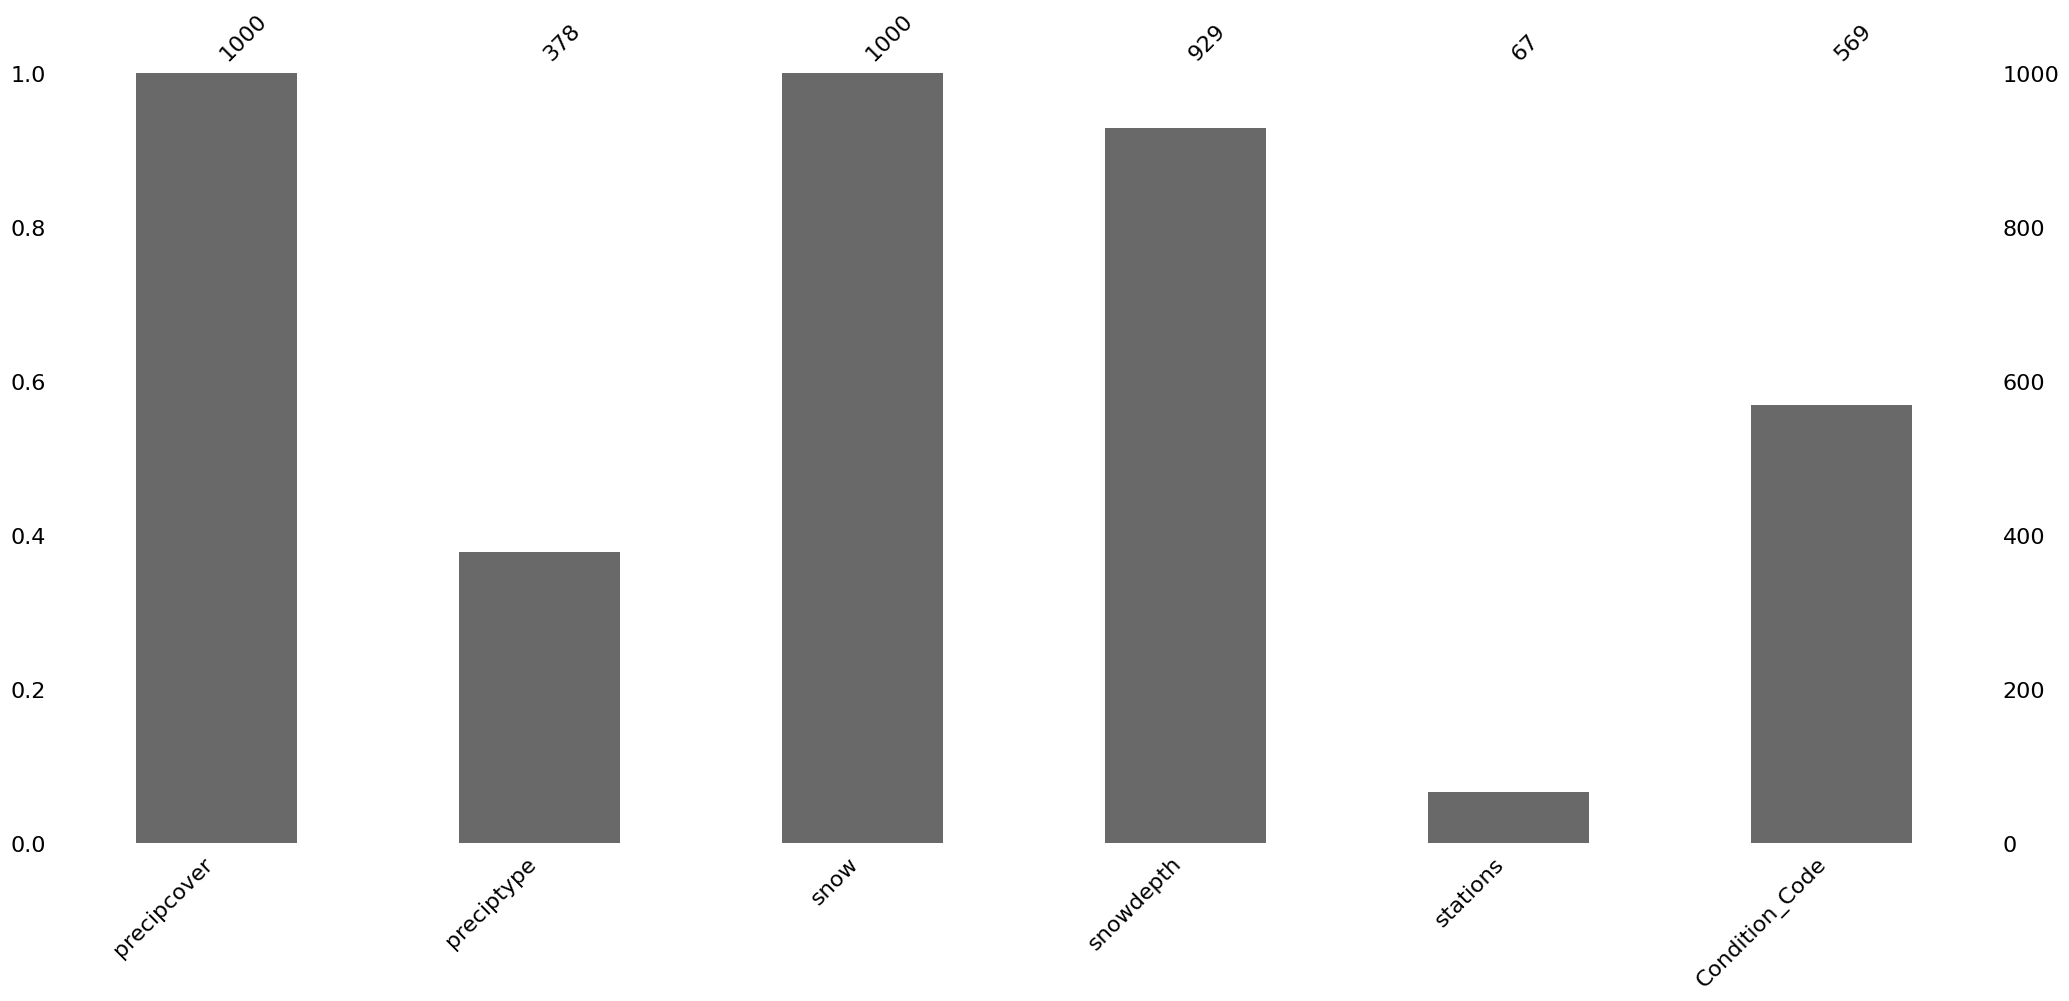

In [6]:
colunas_para_analise = ['precipcover', 'preciptype', 'snow','snowdepth', 'stations', 'Condition_Code']
ax = msno.bar(dataset[colunas_para_analise].sample(1000))

Até aqui identificamos possíveis tratamentos de dados. Mas antes disso, precisamos entender um pouco mais as informações e tentar descobrir quais eventos influencião para o risco de clima severo, pontuação de severidade, risco a saúde, elevação da temperatura média e recorrencia de temperaturas máximas.

In [7]:
# intervalo de tempo do conjunto de dados

dataset['datetime'].min(), dataset['datetime'].max()

('2024-09-07', '2024-09-21')

Visto que os dados são de um período curso para análises históricas. Vamos analisar correlações e plotar alguns gráficos para descobrir mais.

In [8]:
# seleção de colunas numéricas

dataset_num = dataset.select_dtypes(include=['number'])

### Correlação

In [9]:
df_correlation = dataset_num.corr()
df_correlation['Health_Risk_Score'].sort_values(ascending=False)

Health_Risk_Score    1.000000
Heat_Index           0.610722
Severity_Score       0.585555
windgust             0.583670
dew                  0.581391
severerisk           0.524030
feelslike            0.522430
feelslikemax         0.518574
windspeed            0.487805
feelslikemin         0.454905
tempmin              0.434786
temp                 0.412288
tempmax              0.354713
precipprob           0.321389
precipcover          0.284049
humidity             0.186211
uvindex              0.173279
precip               0.143755
cloudcover           0.136964
solarradiation       0.085156
solarenergy          0.081934
Temp_Range          -0.056190
moonphase           -0.106345
sunriseEpoch        -0.108654
datetimeEpoch       -0.111190
sunsetEpoch         -0.115130
visibility          -0.176669
winddir             -0.183140
pressure            -0.297056
snow                      NaN
snowdepth                 NaN
Condition_Code            NaN
Month                     NaN
Name: Heal

array([[<Axes: xlabel='Health_Risk_Score', ylabel='Health_Risk_Score'>,
        <Axes: xlabel='Heat_Index', ylabel='Health_Risk_Score'>,
        <Axes: xlabel='windgust', ylabel='Health_Risk_Score'>,
        <Axes: xlabel='dew', ylabel='Health_Risk_Score'>,
        <Axes: xlabel='feelslike', ylabel='Health_Risk_Score'>],
       [<Axes: xlabel='Health_Risk_Score', ylabel='Heat_Index'>,
        <Axes: xlabel='Heat_Index', ylabel='Heat_Index'>,
        <Axes: xlabel='windgust', ylabel='Heat_Index'>,
        <Axes: xlabel='dew', ylabel='Heat_Index'>,
        <Axes: xlabel='feelslike', ylabel='Heat_Index'>],
       [<Axes: xlabel='Health_Risk_Score', ylabel='windgust'>,
        <Axes: xlabel='Heat_Index', ylabel='windgust'>,
        <Axes: xlabel='windgust', ylabel='windgust'>,
        <Axes: xlabel='dew', ylabel='windgust'>,
        <Axes: xlabel='feelslike', ylabel='windgust'>],
       [<Axes: xlabel='Health_Risk_Score', ylabel='dew'>,
        <Axes: xlabel='Heat_Index', ylabel='dew'>,
  

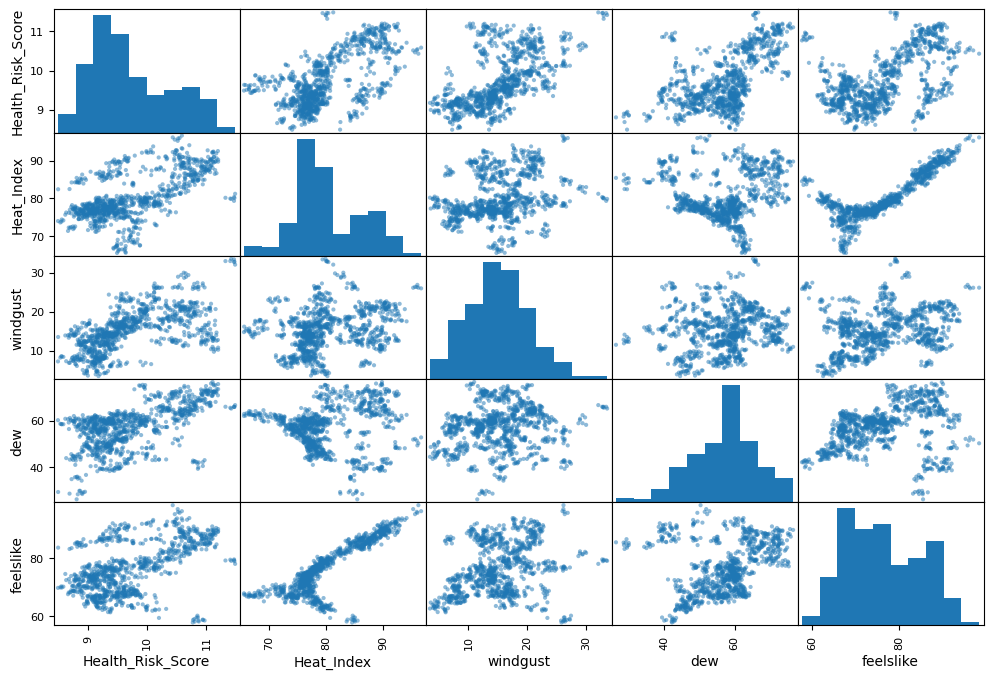

In [10]:
from pandas.plotting import scatter_matrix

atributes = ['Health_Risk_Score', 'Heat_Index', 'windgust', 'dew', 'feelslike']
scatter_matrix(dataset_num[atributes], figsize=(12,8))

C:\Users\Lucas\AppData\Local\Temp\ipykernel_1984\180744551.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


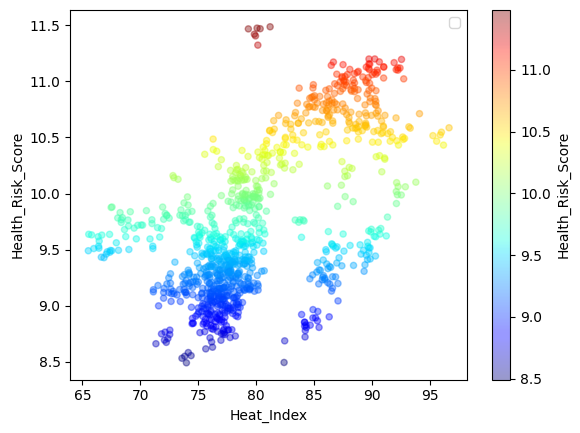

In [11]:
import matplotlib.pyplot as plt

dataset_num.plot(kind='scatter',x='Heat_Index',y='Health_Risk_Score',alpha=0.4,
       c='Health_Risk_Score', cmap=plt.get_cmap('jet'),colorbar=True,) 
plt.figsize=(10,7)
plt.legend()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_1984\2844190781.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


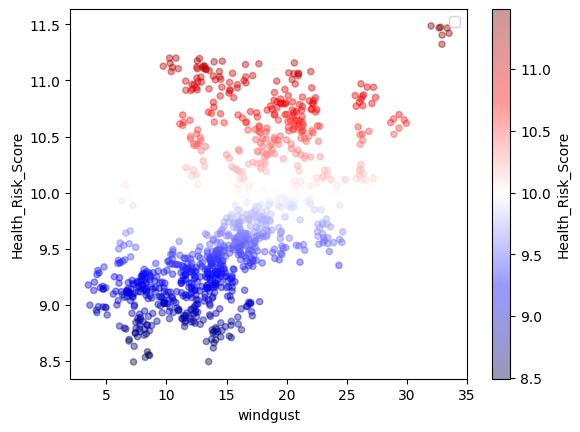

In [12]:
plt.figsize=(10,7)
dataset_num.plot(kind='scatter',x='windgust',y='Health_Risk_Score',alpha=0.4,
       c='Health_Risk_Score', cmap=plt.get_cmap('seismic'),colorbar=True,) 
plt.legend()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_1984\339463230.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


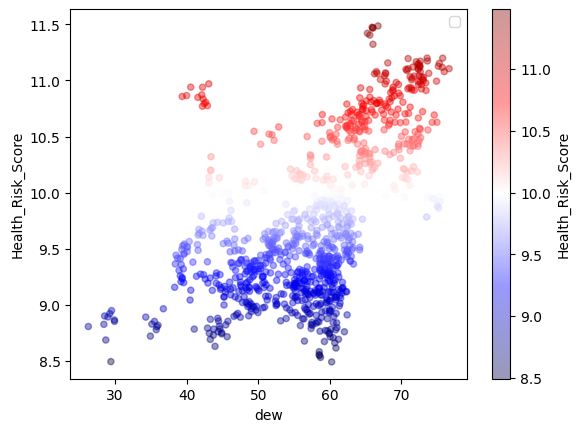

In [13]:
plt.figsize=(10,7)
dataset_num.plot(kind='scatter',x='dew',y='Health_Risk_Score',alpha=0.4,
       c='Health_Risk_Score', cmap=plt.get_cmap('seismic'),colorbar=True,) 
plt.legend()

Como se pode ver, o índice de temperatura, velocidade das rajadas de vento e o ponto de orvalo possuem grande relação com o risco à saúde

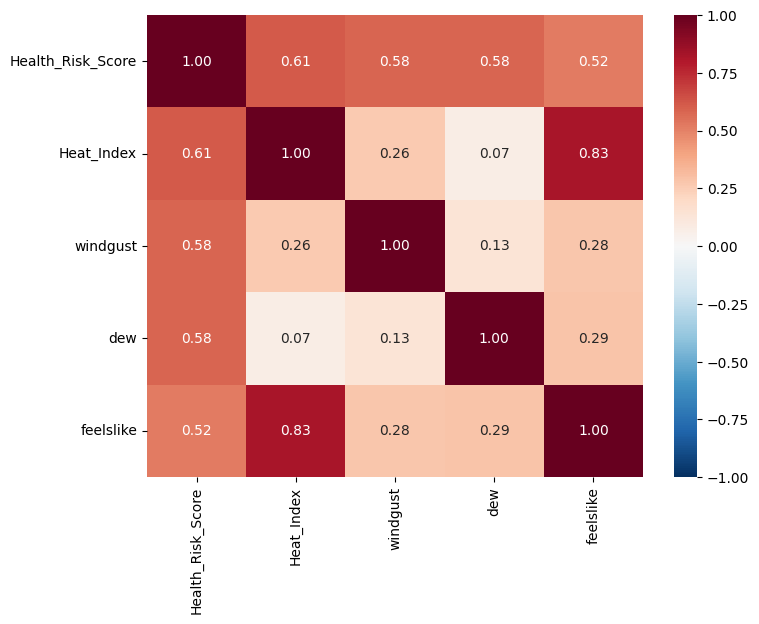

In [14]:
from seaborn import heatmap

fig, ax = plt.subplots(figsize=(8, 6))
ax = heatmap(
    dataset_num[atributes].corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
)

Agora que exploramos o conjunto de dados, com base nos eventos climaticos, criaremos um modelo de alerta para o score de risco a saúde.

# Separação em dados de Treino e Teste

<Axes: >

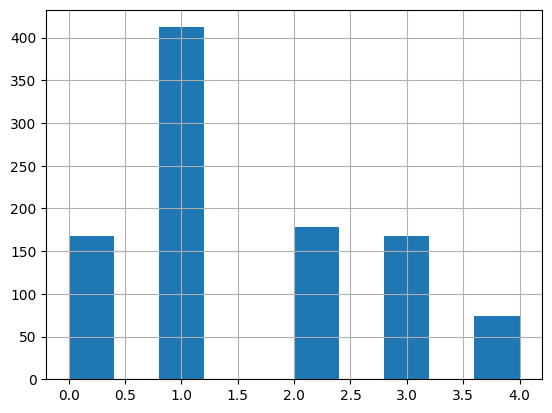

In [15]:
dataset['Health_Risk_Score_bins'] = pd.cut(dataset['Health_Risk_Score'], bins=5, labels=False)
dataset['Health_Risk_Score_bins'].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(dataset, dataset["Health_Risk_Score_bins"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [17]:
# análise de proporção

strat_test_set['Health_Risk_Score_bins'].value_counts() / len(strat_test_set)

Health_Risk_Score_bins
1    0.413333
2    0.180000
0    0.166667
3    0.166667
4    0.073333
Name: count, dtype: float64

# Pipeline de Transformação de Dados

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [19]:
# Passo 1: Definindo um Transformer personalizado para conversão de horas para segundos

class HorasParaSegundosTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = pd.to_timedelta(X_copy[col]).dt.total_seconds()
        return X_copy    

In [20]:
# Passo 2: Definindo as colunas a serem tratadas

colunas_excluidas_num = ['preciptype', 'stations', 'Condition_Code', 'Health_Risk_Score', 'Health_Risk_Score_bins'] # Numerico
colunas_categoricas = ['conditions', 'City'] # Categóricas
colunas_time = ['sunrise', 'sunset'] # Colunas de tempo

In [21]:
# Separando o dataset original em numérico e categórico

num_cols = strat_train_set.select_dtypes(include=['number']).columns.tolist()
cat_cols = strat_train_set.select_dtypes(include=['object']).columns.tolist()

In [22]:
# Excluindo as colunas desnecessárias
num_cols = [col for col in num_cols if col not in colunas_excluidas_num]

In [23]:
# Passo 3: Construindo o Pipeline para as colunas numéricas (inclui tratamento de nulos)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ])

In [24]:
# Passo 4: Construindo o Pipeline para as colunas categóricas (OneHotEncoding)
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

In [25]:
# Passo 5: Construindo o Pipeline para as colunas de tempo (converter horas em segundos)
time_pipeline = Pipeline([
    ('time_to_seconds', HorasParaSegundosTransformer(columns=colunas_time))
])

In [26]:
# Passo 6: Usando o ColumnTransformer para aplicar as transformações necessárias

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, colunas_categoricas),
    ('time', time_pipeline, colunas_time)
])

# Passo 7: Criando o Pipeline final que inclui o preprocessor
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('std_scaler', StandardScaler())
])

In [27]:
# Passo 8: Aplicando o Pipeline no dataset
X = strat_train_set.drop('Health_Risk_Score', axis=1)
y = strat_train_set['Health_Risk_Score']

# Aplicando o pipeline no conjunto de dados
X_prepared = full_pipeline.fit_transform(X)

# O conjunto X_prepared agora contém todas as transformações, está pronto para ser usado em modelos de Machine Learning

In [28]:
X_prepared.shape

(700, 47)

# Aplicação de modelos

## Modelo Base

Primeiro vamos chamar o modelo de base - Dummy - ele será útil para comparar e ver se os modelos aplicados estão conseguindo aprender ou apenas retornando valores aleatórios. Para que o modelo "aprenda" ele deve superar o resultado do Dummy

In [29]:
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy='mean')  # Usando a estratégia 'mean'
dummy_regressor.fit(X_prepared, y)

X_teste = strat_test_set.drop('Health_Risk_Score', axis=1)
y_teste = strat_test_set['Health_Risk_Score']

y_pred_dummy = dummy_regressor.predict(X_teste)

# Avaliar o DummyRegressor
mae_dummy = mean_absolute_error(y_teste, y_pred_dummy)
mse_dummy = mean_squared_error(y_teste, y_pred_dummy)
rmse_dummy = np.sqrt(mse_dummy)

print(f"Dummy Regressor - Mean Absolute Error: {mae_dummy:.3f}")
print(f"Dummy Regressor - Mean Squared Error: {mse_dummy:.3f}")
print(f"Dummy Regressor - Root Mean Squared Error: {rmse_dummy:.3f}")

Dummy Regressor - Mean Absolute Error: 0.556
Dummy Regressor - Mean Squared Error: 0.443
Dummy Regressor - Root Mean Squared Error: 0.665


## Regressão Linear 

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

LinearRegression()

O Mean Absolute Error (MAE) mede a média dos erros absolutos entre as previsões do modelo e os valores reais. Em outras palavras, ele calcula a média das diferenças absolutas entre cada valor previsto e o valor real correspondente.

O Mean Squared Error (MSE) calcula a média dos quadrados dos erros entre as previsões do modelo e os valores reais. Ao elevar ao quadrado as diferenças, o MSE penaliza erros maiores mais fortemente do que erros menores.

O Root Mean Squared Error (RMSE) é a raiz quadrada do MSE. Ele fornece uma medida do erro padrão das previsões e é expresso na mesma unidade que os dados originais, o que facilita a interpretação.

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predicoes = lin_reg.predict(X_prepared)
lin_mse = mean_squared_error(y, predicoes)
lin_mae = mean_absolute_error(y, predicoes)
lin_rmse = np.sqrt(lin_mse)

print(f"Regressão Linear - Mean Absolute Error: {lin_mae:.3f}")
print(f"Regressão Linear - Mean Squared Error: {lin_mse:.3f}")
print(f"Regressão Linear - Root Mean Squared Error: {lin_rmse:.3f}")

Regressão Linear - Mean Absolute Error: 0.082
Regressão Linear - Mean Squared Error: 0.011
Regressão Linear - Root Mean Squared Error: 0.106


### Visualização do resultado Regressão Linear

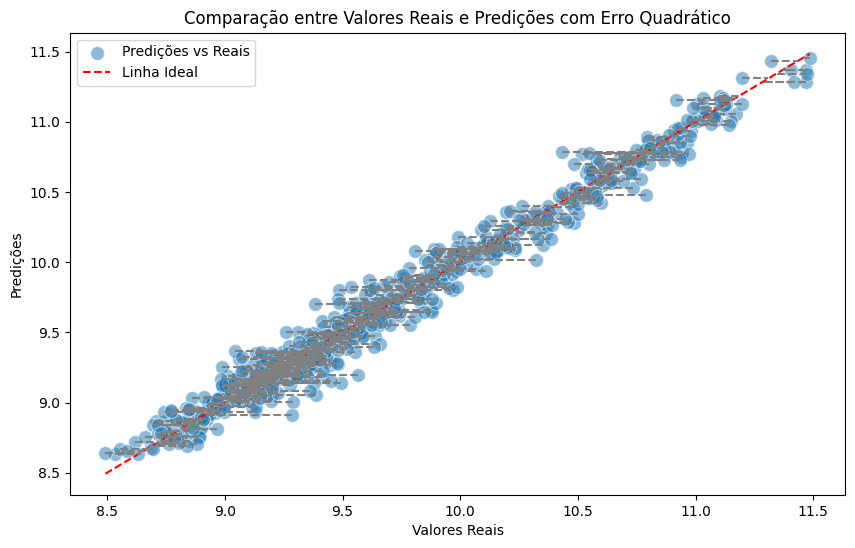

In [32]:
errors = y - predicoes


grafico = pd.DataFrame({
    'y': y,
    'y_pred': predicoes,
    'error': errors
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='y', y='y_pred', data=grafico, alpha=0.5, s=100, label='Predições vs Reais')

# Adicionar a linha de 45 graus (linha ideal)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Linha Ideal')

# Adicionar linhas de erro
for i in range(len(grafico)):
    plt.plot([grafico['y'].iloc[i], grafico['y_pred'].iloc[i]], [grafico['y_pred'].iloc[i], grafico['y_pred'].iloc[i]], color='gray', linestyle='--')

# Adicionar rótulos e título
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Comparação entre Valores Reais e Predições com Erro Quadrático')
plt.legend()

## RandomForest 

In [33]:
from sklearn.ensemble import RandomForestRegressor

#forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg = RandomForestRegressor(random_state=42, bootstrap=True, min_samples_split=4, n_estimators=162)
forest_reg.fit(X_prepared, y)

X_forest_predict = forest_reg.predict(X_prepared)
forest_mse = mean_squared_error(y, X_forest_predict)
forest_mae = mean_absolute_error(y, X_forest_predict)
forest_rmse = np.sqrt(forest_mse)

print(f"RandomForest Regressor - Mean Absolute Error: {forest_mae:.3f}")
print(f"RandomForest Regressor - Mean Squared Error: {forest_mse:.3f}")
print(f"RandomForest Regressor - Root Mean Squared Error: {forest_rmse:.3f}")

RandomForest Regressor - Mean Absolute Error: 0.031
RandomForest Regressor - Mean Squared Error: 0.002
RandomForest Regressor - Root Mean Squared Error: 0.047


### Visualização do resultado RandomForest Regressor

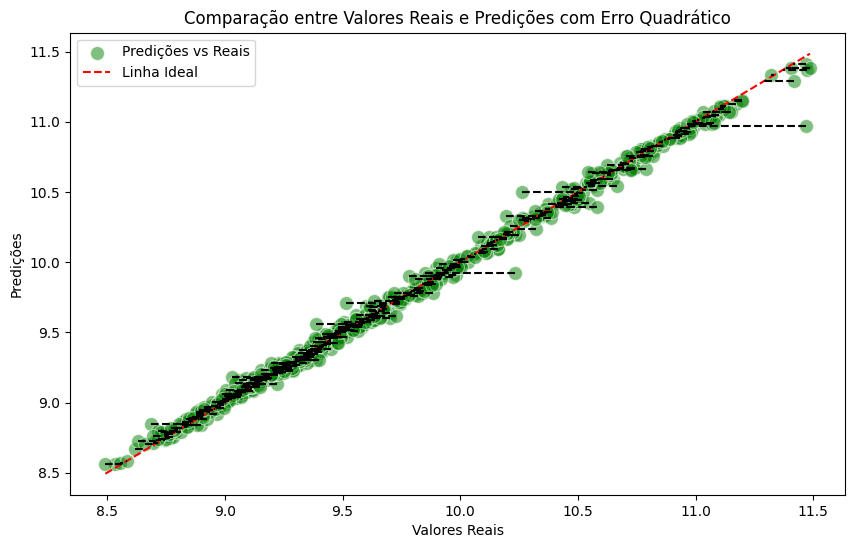

In [34]:
errors = y - X_forest_predict


grafico = pd.DataFrame({
    'y': y,
    'y_pred': X_forest_predict,
    'error': errors
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='y', y='y_pred', data=grafico,color='green', alpha=0.5, s=100, label='Predições vs Reais')

# Adicionar a linha de 45 graus (linha ideal)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Linha Ideal')

# Adicionar linhas de erro
for i in range(len(grafico)):
    plt.plot([grafico['y'].iloc[i], grafico['y_pred'].iloc[i]], [grafico['y_pred'].iloc[i], grafico['y_pred'].iloc[i]], color='black', linestyle='--')

# Adicionar rótulos e título
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Comparação entre Valores Reais e Predições com Erro Quadrático')
plt.legend()

### Validação cruzada

In [35]:
def display_scores(scores):
    media = scores.mean()
    desvio = scores.std()
    print("Scores:", scores)
    print(" ")
    print(f"Standard deviation: {desvio:.2f}")
    print("Média %.2f" % media)
    print(f"Intervalo 95,4% de confiança {(media - 2 * desvio):.2f}, {( media + 2 * desvio):.2f}")
    

### Aplicando o modelos em diferentes conjuntos de dados para mensurar a performance

In [36]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(
                    forest_reg, X_prepared, y, 
                    scoring='neg_mean_squared_error', cv=10
)
forest_rmse_scores = np.sqrt(-forest_scores)   

display_scores(forest_rmse_scores)

Scores: [0.12084728 0.08834757 0.1675029  0.13833924 0.15074838 0.12040023
 0.10219328 0.08828406 0.10666496 0.11444404]
 
Standard deviation: 0.02
Média 0.12
Intervalo 95,4% de confiança 0.07, 0.17


# Otimização de Híper Parâmetros

RandomizedSearchCV: classe para realizar uma busca aleatória pelos melhores hiperparâmetros para um modelo

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [39]:
param_distribs = {
    'n_estimators': randint(low=70, high=300),
    'bootstrap':[True,False],
    'min_samples_split': randint(low=1, high=10)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                    n_iter=5,  cv=5, scoring='neg_mean_squared_error',
                                    random_state=42)     
rnd_search.fit(X_prepared, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001852A0F6FB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018529F6B7C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [40]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1240963179765044 {'bootstrap': True, 'min_samples_split': 4, 'n_estimators': 162}
0.1258478660734052 {'bootstrap': True, 'min_samples_split': 8, 'n_estimators': 258}
0.12427039301291233 {'bootstrap': True, 'min_samples_split': 7, 'n_estimators': 191}
0.12444085077485381 {'bootstrap': True, 'min_samples_split': 7, 'n_estimators': 144}
0.12575548765451905 {'bootstrap': True, 'min_samples_split': 8, 'n_estimators': 186}


### Salvar o modelo

In [41]:
import joblib

forest_reg = RandomForestRegressor(random_state=42, bootstrap=True, min_samples_split=4, n_estimators=162)
forest_reg.fit(X_prepared, y)

joblib.dump(forest_reg, 'random_forest_clima.pkl')

['random_forest_clima.pkl']

In [ ]:
# Para carregar o modelo salvo

#forest_clima = joblib.load('random_forest_clima.pkl')